In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [91]:
etch = '/Users/charliegu_1/Documents/GitHub/E11-ZhongGuo/etch-soda data.csv'
unit3 = '/Users/charliegu_1/Documents/GitHub/E11-ZhongGuo/unit3.csv'
rsf = '/Users/charliegu_1/Documents/GitHub/E11-ZhongGuo/rsf_3.csv'
glade = '/Users/charliegu_1/Documents/GitHub/E11-ZhongGuo/glade data.csv'

etch_data = pd.read_csv(etch)
unit3_data = pd.read_csv(unit3)
rsf_data = pd.read_csv(rsf)
glade_data = pd.read_csv(glade)

In [92]:
etch_data.head()

,\tEpoch time,Latitude,Longitude,Radiation (cps)`\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t
0,1.682546e+09,37.875344,-122.258896,36.0
1,1.682546e+09,37.875343,-122.258900,36.4
2,1.682546e+09,37.875341,-122.258908,41.8
3,1.682546e+09,37.875333,-122.258918,35.6
4,1.682546e+09,37.875348,-122.258905,34.2


In [89]:
etch_data.rename(columns = {'Radiation (cps)`\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t': 'Radiation'}, inplace = True)

In [93]:
unit3_data.rename(columns = {'Radiation (cps)`\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t': 'Radiation'}, inplace = True)

In [6]:
rsf_data.rename(columns = {'Radiation (cps)`\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t': 'Radiation'}, inplace = True)

In [7]:
glade_data.rename(columns = {'Radiation (cps)`\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t': 'Radiation'}, inplace = True)

## Etcheverry Data

In [68]:
etch_mean = etch_data['Radiation'].mean()
etch_std = etch_data['Radiation'].std()

print(etch_mean)
print(etch_std)

35.473417721519
4.045913064859386


In [9]:
etch_data.head()

,\tEpoch time,Latitude,Longitude,Radiation
0,1.682546e+09,37.875344,-122.258896,36.0
1,1.682546e+09,37.875343,-122.258900,36.4
2,1.682546e+09,37.875341,-122.258908,41.8
3,1.682546e+09,37.875333,-122.258918,35.6
4,1.682546e+09,37.875348,-122.258905,34.2


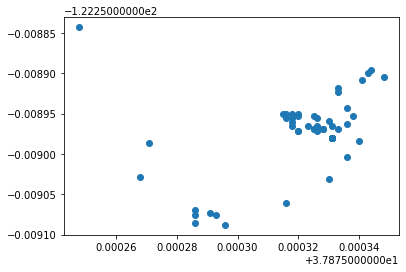

In [10]:
plt.scatter(x = etch_data['Latitude'], y = etch_data['Longitude'])
plt.show()

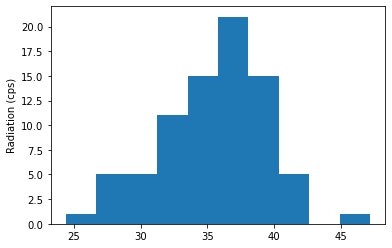

In [24]:
plt.hist(etch_data['Radiation'])

plt.ylabel('Radiation (cps)')

plt.show()

## Unit 3 Data

In [94]:
unit3_mean = unit3_data['Radiation (cps)'].mean()
unit3_std = unit3_data['Radiation (cps)'].std()

print(unit3_mean)
print(unit3_std)

37.227522935779824
3.096170620467024


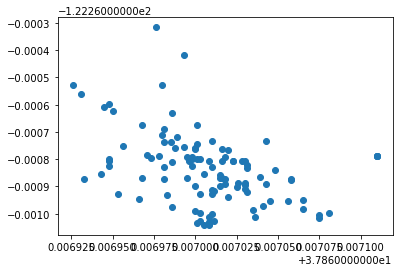

In [13]:
plt.scatter(x = unit3_data['Latitude'], y = unit3_data['Longitude'])
plt.show()

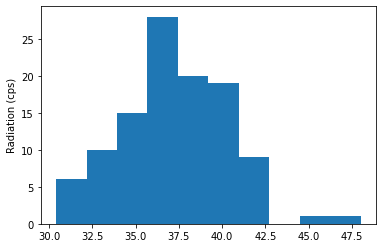

In [14]:
plt.hist(unit3_data['Radiation (cps)'])

plt.ylabel('Radiation (cps)')

plt.show()

## RSF Data

In [15]:
rsf_mean = rsf_data['Radiation (cps)'].mean()
rsf_std = rsf_data['Radiation (cps)'].std()

print(rsf_mean)
print(rsf_std)

30.717757009345796
2.48010244326273


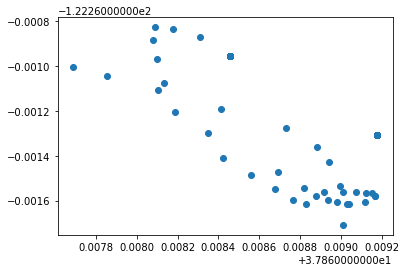

In [16]:
plt.scatter(x = rsf_data['Latitude'], y = rsf_data['Longitude'])
plt.show()

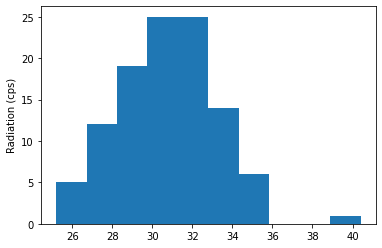

In [17]:
plt.hist(rsf_data['Radiation (cps)'])

plt.ylabel('Radiation (cps)')

plt.show()

## Glade Data

In [18]:
glade_mean = glade_data['Radiation (cps)'].mean()
glade_std = glade_data['Radiation (cps)'].std()

print(glade_mean)
print(glade_std)

46.7088888888889
3.0513450504210575


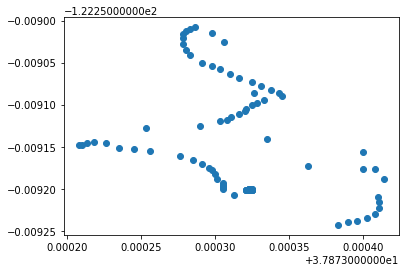

In [19]:
plt.scatter(x = glade_data['Latitude'], y = glade_data['Longitude'])
plt.show()

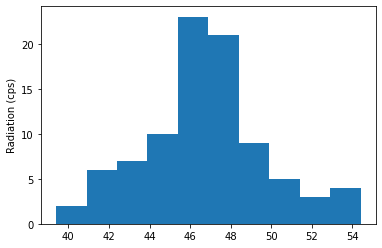

In [20]:
plt.hist(glade_data['Radiation (cps)'])
plt.ylabel('Radiation (cps)')

plt.show()

## Comparison

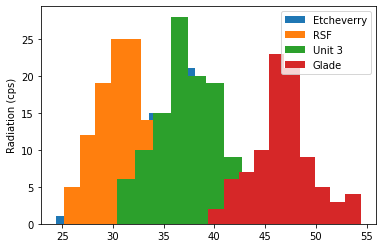

In [21]:
plt.hist(etch_data['Radiation'], label = 'Etcheverry')
plt.hist(rsf_data['Radiation (cps)'], label = 'RSF')
plt.hist(unit3_data['Radiation (cps)'], label = 'Unit 3')
plt.hist(glade_data['Radiation (cps)'], label = 'Glade')

plt.legend('Histograms of all locations')
plt.ylabel('Radiation (cps)')
plt.legend(loc = 'upper right')

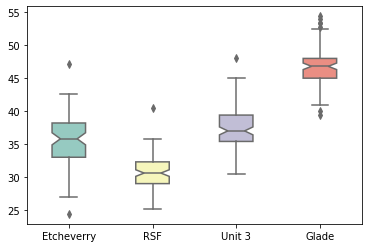

In [30]:
data_combined = [etch_data['Radiation'], rsf_data['Radiation (cps)'], unit3_data['Radiation (cps)'], glade_data['Radiation (cps)']]

ax = sns.boxplot(data=data_combined, width=0.4, palette='Set3', notch=True, dodge=False)

ax.set_xticklabels(['Etcheverry', 'RSF', 'Unit 3', 'Glade'])

plt.show()

## Activity Calculator

In [38]:
def activity(cps):
    mean = cps.mean() * 60
    doserate = mean * .0000427 * 1e-6
    activity = doserate * 70/(3600 * 500 * 1.6e-16)
    return activity

In [39]:
etch_activity = activity(etch_data['Radiation'])
etch_activity

22089.59282700422

In [45]:
glade_activity = activity(glade_data['Radiation (cps)'])
glade_activity

29086.014351851856

In [57]:
unit3_activity = activity(unit3_data['Radiation (cps)'])
unit3_activity

23181.888761467893

In [74]:
rsf_activity = activity(rsf_data['Radiation (cps)'])
rsf_activity

19128.203271028033

In [78]:
def dose(cps):
    mean = cps.mean() * 60 * 0.0000427
    return mean

In [80]:
etch_dose = dose(etch_data['Radiation'])
etch_dose

0.09088289620253168

In [83]:
glade_dose = dose(glade_data['Radiation (cps)'])
glade_dose

0.11966817333333338

In [100]:
unit3_activity = dose(unit3_data['Radiation (cps)'])
unit3_activity

0.09537691376146791

In [101]:
rsf_activity = dose(rsf_data['Radiation (cps)'])
rsf_activity

0.07869889345794392